In [42]:
 #IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split


In [43]:
#Read the Data
df = pd.read_csv("Superstore_ProfitTarget.csv")
df.head()


,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sales,Quantity,Discount,Profit
0,2019-01-01,2019-01-03,First Class,Home Office,United States,Houston,AZ,Central,Technology,184.789202,6,0.035628,418.122744
1,2019-01-02,2019-01-04,Standard Class,Consumer,United States,Phoenix,CA,South,Technology,196.526830,5,0.006054,56.373425
2,2019-01-03,2019-01-05,First Class,Consumer,United States,New York,TX,East,Technology,1031.492278,6,0.478251,523.581062
3,2019-01-04,2019-01-06,First Class,Consumer,United States,Phoenix,CA,South,Office Supplies,651.155783,9,0.368754,179.725981
4,2019-01-05,2019-01-07,Standard Class,Consumer,United States,Phoenix,NY,West,Furniture,308.781843,9,0.176626,-157.840659


In [44]:
#Statistical Analysis
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  300 non-null    object 
 1   Ship Date   300 non-null    object 
 2   Ship Mode   300 non-null    object 
 3   Segment     300 non-null    object 
 4   Country     300 non-null    object 
 5   City        300 non-null    object 
 6   State       300 non-null    object 
 7   Region      300 non-null    object 
 8   Category    300 non-null    object 
 9   Sales       300 non-null    float64
 10  Quantity    300 non-null    int64  
 11  Discount    300 non-null    float64
 12  Profit      300 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 30.6+ KB


In [45]:
df.describe()        # Descriptive Statistics


,Sales,Quantity,Discount,Profit
count,300.000000,300.000000,300.000000,300.000000
mean,742.970855,4.900000,0.250155,149.750961
std,430.916065,2.538664,0.143622,257.197420
min,17.360572,1.000000,0.001609,-298.591405
25%,363.940455,3.000000,0.125306,-51.189578
50%,751.551008,5.000000,0.258837,158.899072
75%,1076.700524,7.000000,0.377735,360.238558
max,1499.126451,9.000000,0.499174,595.893765


In [46]:
df.describe(include='object')

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category
count,300,300,300,300,300,300,300,300,300
unique,300,300,3,3,1,5,5,4,3
top,2019-10-27,2019-10-29,First Class,Consumer,United States,Phoenix,IL,West,Furniture
freq,1,1,107,113,300,69,66,83,109


In [47]:
#Handling Missing Values
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())



In [48]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [49]:
#Handling Duplicates
df.duplicated().sum()


np.int64(0)

In [50]:
df = df.drop_duplicates()    #finding duplicates

In [51]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sales,Quantity,Discount,Profit
0,2019-01-01,2019-01-03,First Class,Home Office,United States,Houston,AZ,Central,Technology,184.789202,6,0.035628,418.122744
1,2019-01-02,2019-01-04,Standard Class,Consumer,United States,Phoenix,CA,South,Technology,196.526830,5,0.006054,56.373425
2,2019-01-03,2019-01-05,First Class,Consumer,United States,New York,TX,East,Technology,1031.492278,6,0.478251,523.581062
3,2019-01-04,2019-01-06,First Class,Consumer,United States,Phoenix,CA,South,Office Supplies,651.155783,9,0.368754,179.725981
4,2019-01-05,2019-01-07,Standard Class,Consumer,United States,Phoenix,NY,West,Furniture,308.781843,9,0.176626,-157.840659


In [52]:
#Handleing Outliers 
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

for col in df.select_dtypes(include=np.number).columns:
    remove_outliers(col)


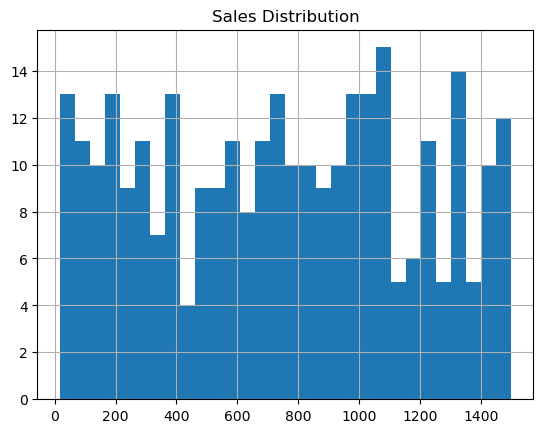

In [53]:
#Visual Analysis
df['Sales'].hist(bins=30)
plt.title("Sales Distribution")
plt.show()



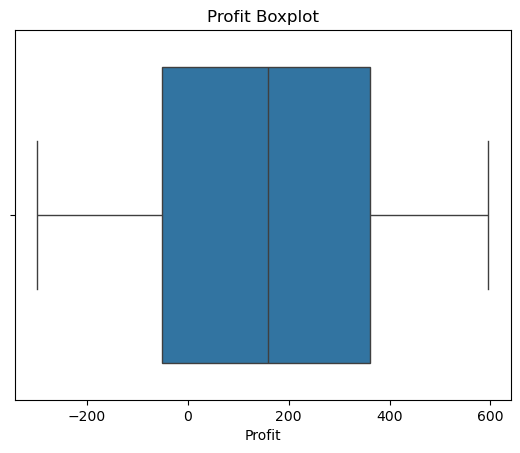

In [54]:
sns.boxplot(x=df['Profit'])
plt.title("Profit Boxplot")           #boxplot
plt.show()




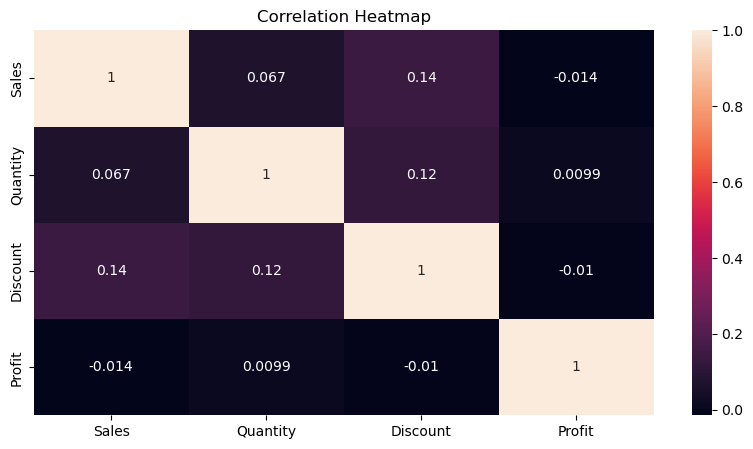

In [55]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()                                            #Heatmap



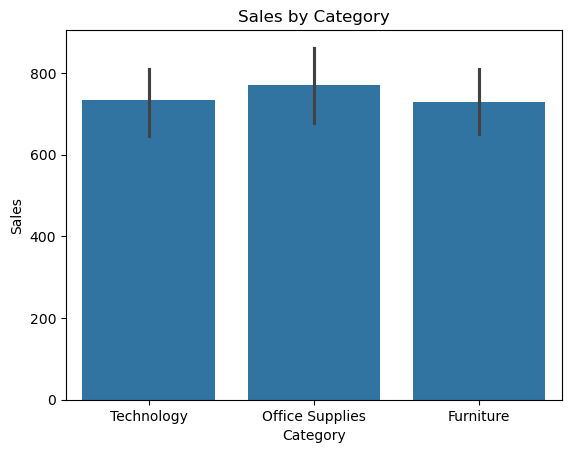

In [56]:
sns.barplot(data=df, x="Category", y="Sales")
plt.title("Sales by Category")               #Barplot
plt.show()



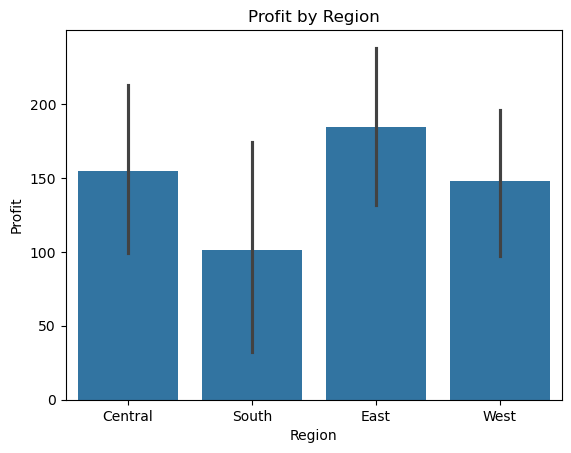

In [57]:
sns.barplot(data=df, x="Region", y="Profit")
plt.title("Profit by Region")
plt.show()

In [58]:
#Skewness & Kurtosis
for col in df.select_dtypes(include=np.number).columns:
    print(col, "Skew:", skew(df[col]), "Kurtosis:", kurtosis(df[col]))


Sales Skew: -0.011949425370469361 Kurtosis: -1.1655393126143923
Quantity Skew: 0.061918416646127766 Kurtosis: -1.1868040779580797
Discount Skew: -0.04928834634370054 Kurtosis: -1.1967127789354874
Profit Skew: -0.06009301008680381 Kurtosis: -1.1875968518155904


In [59]:
#Label Encoding for Categorical Columns
le = LabelEncoder()
for col in ['Category','Segment','Region']:
    df[col] = le.fit_transform(df[col])
    
df = pd.get_dummies(df, columns=['Ship Mode'], drop_first=True)    


In [60]:
X = df.select_dtypes(include=np.number).drop(['Profit'], axis=1)                      # Separating Features (X) and Target (y)
y = df['Profit']

In [61]:
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)                                       # Feature Selection using SelectKBest

In [62]:
selected_features = X.columns[selector.get_support()]
selected_features                                     # Selected top features

Index(['Region', 'Category', 'Sales', 'Quantity', 'Discount'], dtype='object')

In [63]:
# Scaling the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)


In [64]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape                                               # Train-Test Split


((240, 5), (60, 5))

In [65]:
y

0      418.122744
1       56.373425
2      523.581062
3      179.725981
4     -157.840659
          ...    
295   -171.665270
296    501.087332
297     11.289715
298   -160.986227
299   -277.097016
Name: Profit, Length: 300, dtype: float64

In [66]:
X.columns


Index(['Segment', 'Region', 'Category', 'Sales', 'Quantity', 'Discount'], dtype='object')

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR                                  #importing libraries

In [68]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "SVR": SVR()
}

In [69]:
for name, model in models.items():

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mae  = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds)
    r2   = r2_score(y_test, preds)

    print(f"{name}:")
    print(f" MAE : {mae:.4f}")
    print(f" RMSE: {rmse:.4f}")
    print(f" R²  : {r2:.4f}")
 

Linear Regression:
 MAE : 218.5483
 RMSE: 63986.6103
 R²  : -0.0649
Decision Tree:
 MAE : 316.0411
 RMSE: 146338.1568
 R²  : -1.4354
Random Forest:
 MAE : 222.3954
 RMSE: 69376.9455
 R²  : -0.1546
SVR:
 MAE : 214.8561
 RMSE: 62106.3269
 R²  : -0.0336


In [70]:
import joblib          #importing joblib

In [71]:
a= joblib.dump(model, f"{name}.joblib")        #dumping joblib


In [72]:
a

['SVR.joblib']